In [1]:
!pip install --upgrade fastai

     |████████████████████████████████| 194kB 4.5MB/s 
     |████████████████████████████████| 51kB 5.7MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
from fastai.vision.all import *

In [3]:
torch.cuda.is_available()

True

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()

(#2) [Path('testing'),Path('training')]

In [6]:
mnist = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128),
)

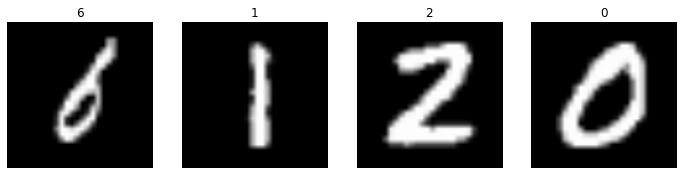

In [7]:
dls = mnist.dataloaders((path/'training'))
dls.valid.show_batch(max_n=4, nrows=1)

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.0003981071640737355)

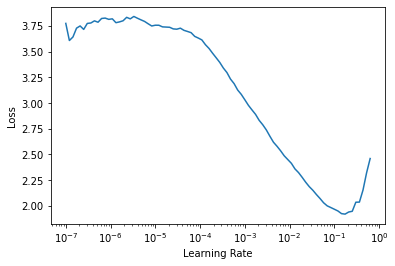

In [8]:
learn = cnn_learner(dls, resnet18, pretrained=False, metrics=accuracy)
learn.lr_find()

In [10]:
# 1 epoch for demonstration
learn.fit_one_cycle(1, wd=0.1, lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.038369,0.030439,0.991833,01:26


In [11]:
learn.export(fname='mnist_resnet18.pkl')

In [12]:
pred = learn.predict(path/'testing/5/1954.png')
pred

('5',
 tensor(5),
 tensor([1.8252e-06, 1.9829e-06, 1.4140e-07, 2.8029e-06, 2.4895e-07, 9.9972e-01,
         1.1586e-04, 1.2501e-06, 9.2430e-05, 6.1561e-05]))